<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Interpola%C3%A7%C3%A3o_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Interpolação polinomial**


 *José Claudinei Ferrreira*

 *Universidade Federal de Alfenas (UNIFAL-MG)*

#**A forma de Newton**

No processo de interpolação polinomial, na forma de Newton, estamos interessados em encontrar um polinômio $$p_n(s)=f[x_0]+(s-x_0)f[x_0,x_1]+(s-x_0)(s-x_1)f[x_0,x_1,x_2]+\cdots+(s-x_0)(s-x_1)\cdots(s-x_{n-1})f[x_0,x_1,\ldots,x_n], $$ para o qual $$p_n(x_i)=y_i,$$ quando $x=(x_0,\,x_1,\,\ldots, x_{n})$ e $y=(y_1,\,y_2,\,\ldots,y_n)$ são vetores reais conhecidos.

Por isso, definimos as [diferenças divididas](https://en.wikipedia.org/wiki/Divided_differences) $$\begin{cases}f[x_i]&=&y_i\\\\
f[x_i,x_j]&=&\frac{f[x_i]-f[x_j]}{x_i-x_j}\\\\
f[x_0,x_1,\ldots,x_j]&=&\frac{f[x_0,x_1,\ldots,x_{j-1}]-f[x_1,x_2,\ldots,x_j]}{x_0-x_j}\end{cases}$$

**Obs:**

1. Note que $$p(s)=\sum_{i=0}^n\alpha_i s^i, $$ mas não estamos interessados em determinar $\alpha_i$. Podemos determinar esses parâmetros através de resolução de sistemas lineares; algo paracedo com [ajuste linear de curvas](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/Ajuste_de_curvas_linear.ipynb).

2. Note ainda que
$$p_0(s)=y_0$$ interpola os dados $x_0$ e $y_0$, ou seja, $p_0(x_0)=y_0$.

Da mesma forma
$$p_1(s)=f[x_0]+(s-x_0)f[x_0,x_1]$$ interpola os dados $(x_0,x_1)$ e $(y_0,y_1)$, ou seja, $p_1(x_0)=y_0$ e $$p_1(x_1)=y_0+(x_1-x_0)\frac{y_0-y_1}{x_0-x_1}=y_0-(y_0-y_1)=y_1.$$

E continua, ou seja,
$$p_2(s)=f[x_0]+(s-x_0)f[x_0,x_1]+(s-x_0)(s-x_1)f[x_0,x_1,x_2]$$ interpola os dados $(x_0,x_1,x_2)$ e $(y_0,y_1,y_2)$.

Ou seja, $p_2(x_0)=y_0$,  $p_2(x_1)=y_1$ e $$\begin{cases}p_2(x_2)&=&y_0+(x_2-x_0)\frac{y_0-y_1}{x_0-x_1}+(x_2-x_0)(x_2-x_1)\frac{\frac{y_0-y_1}{x_0-x_1}-\frac{y_1-y_2}{x_1-x_2}}{x_0-x_2}\\\\&=&y_0+(x_2-x_0)\frac{y_0-y_1}{x_0-x_1}+\color{blue}{(x_2-x_0)}\color{red}{(x_2-x_1)}\frac{(y_0-y_1)(x_1-x_2)-(y_1-y_2)(x_0-x_1)}{\color{blue}{(x_0-x_2)}(x_0-x_1)\color{red}{(x_1-x_2)}}\\\\&=&y_0+\frac{(x_2-x_0)(y_0-y_1)+(y_0-y_1)(x_1-x_2)-(y_1-y_2)(x_0-x_1)}{x_0-x_1}\\\\&=&y_0-(y_0-y_1)-(y_1-y_2)\\\\&=&y_2\end{cases}$$

Por fim, você pode verificar que $$p_{j+1}(s)=p_j(s)+N_{j+1}(s),$$ em que $$N_{j+1}(s)=(s-x_0)(s-x_1)\cdots(s-x_{j})f[x_0,x_1,\ldots,x_{j+1}].$$ E valem as igualdades $p_{j+1}(x_i)=y_i$, para $i=0,\,1,\,\ldots,\,j+1$.

<font color=green> Então podemos aproveitar cálculos na interpolação, quando temos $n$ dados e obtemos mais dados.

#**Exemplo 1:**

Considere os dados $x=(x_0,\,x_1,\,\ldots x_{n})$ e $y=(y_1,\,y_2,\,\ldots,y_n)$, para $n=5$.

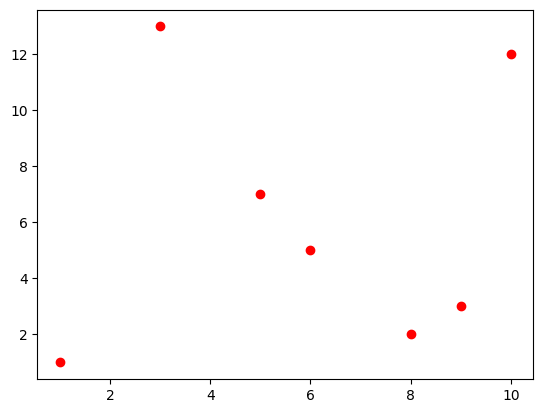

In [ ]:
x,y=[9.0,8,1,6,10,5,3],[3.0,2,1,5,12,7,13]

import matplotlib.pyplot as plt
plt.plot(x,y,'o',color='red')
plt.show()

Vamos calcular os termos $f[x_0,x_1,\ldots,x_{j}]$.

In [ ]:
import numpy as np

n=len(x)

A = 0*np.empty([n,n])

#-------------- Diferenças divididas
for i in range(0,n):
  A[i][0]=y[i]

for j in range(1,n):
  for i in range(0,n-j):
    A[i][j]=(A[i][j-1]-A[i+1][j-1])/(x[i]-x[i+j])

In [ ]:
import pandas as pd

df = pd.DataFrame(A)
display(df),x


,0,1,2,3,4,5,6
0,3.0,1.000000,0.107143,0.145238,0.071825,0.013294,-0.000099
1,2.0,0.142857,-0.328571,0.217063,0.018651,0.013889,0.000000
2,1.0,0.800000,0.105556,0.161111,-0.050794,0.000000,0.000000
3,5.0,1.750000,0.750000,0.059524,0.000000,0.000000,0.000000
4,12.0,1.000000,0.571429,0.000000,0.000000,0.000000,0.000000
5,7.0,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,13.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


(None, [9.0, 8, 1, 6, 10, 5, 3])

Definindo os polinômios $N_{j}(s)$ e $p_n(s)$, <font color=blue> excuindo os dois últimos pontos $(x_i,y_i)$.

In [ ]:
n=n-2

def N(i,s):
  p=1
  for j in range(0,i+1):
    p=p*(s-x[j])
  return p

def poli(s):
  q=A[0][0]
  for i in range(1,n):
    q=q+A[0][i]*N(i-1,s)
  return q

Vejamos se o polinômio é um bom ajuste para os dados:

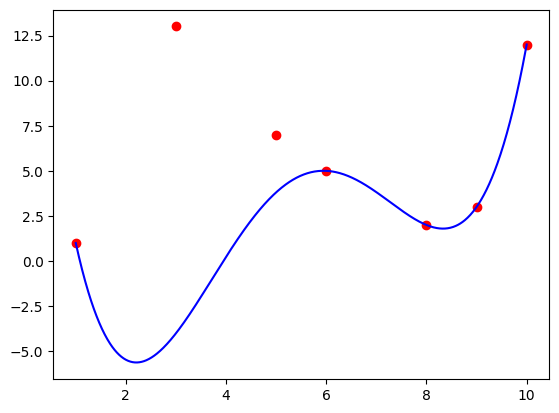

In [ ]:
xx=np.linspace(1,10,1000)
yy=[poli(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue')
plt.show()

De cálculos manuais chegamos a
$$p_3(s)=3+(s-9)+(s-9)(s-8)\frac{3}{28}+(s-9)(s-8)(s-1)\frac{61}{420}$$

In [ ]:
def p3(s):
  p=3+(s-9)+(s-9)*(s-8)*3/28+(s-9)*(s-8)*(s-1)*61/420
  return p

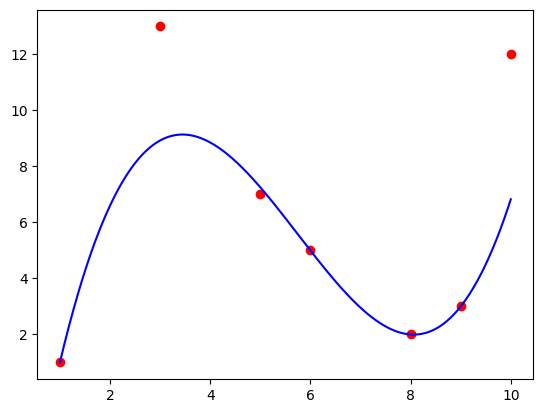

In [ ]:
xx=np.linspace(1,10,1000)
yy=[p3(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue')
plt.show()

Definindo os polinômios $N_{j}(s)$ e $p_n(s)$, <font color=blue> com todos os pontos $(x_i,y_i)$.

In [ ]:
n=len(x)

def N(i,s):
  p=1
  for j in range(0,i+1):
    p=p*(s-x[j])
  return p

def poli(s):
  q=A[0][0]
  for i in range(1,n):
    q=q+A[0][i]*N(i-1,s)
  return q

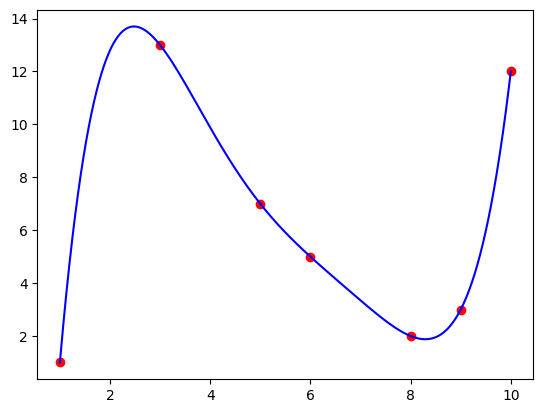

In [ ]:
xx=np.linspace(1,10,1000)
yy=[poli(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue')
plt.show()

#**Exemplo 2:**

Considere $$f(s)=\frac{1}{1+s^2},$$ e encontre o polinômio $p(s)$, que interpole $f(x_i)=y_i$, em que $$x_i=\frac{b-a}{2}\cos\left(\frac{\pi(2i-1)}{2n}\right),\qquad a=-5,\qquad b=5,$$ são inspirados nos [nós de Tchebychev](https://pt.wikipedia.org/wiki/Polin%C3%B4mios_de_Tchebychev), para $i=0,\,1,\,\ldots,\,n=25$.

In [ ]:
n=25
a=-5
b=5

x=[]

for k in range(1,n+1): # Nós de Chebyshev reescalados.
  x.append((b-a)*np.cos(np.pi*(2*k-1)/(2*n))/2)

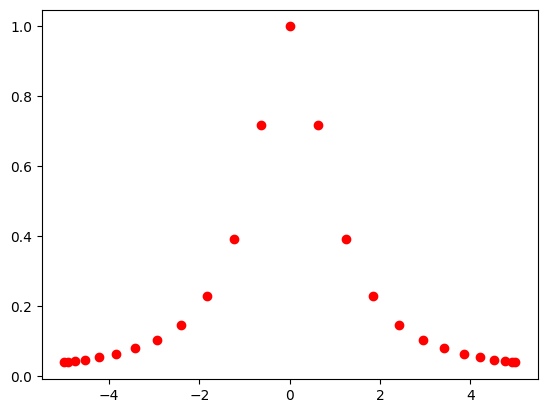

In [ ]:
def f(s):
  return 1/(1+s**2)

y=[f(s) for s in x]

n=len(x)

plt.plot(x,y,'o',color="red")
plt.show()

Vamos calcular os termos $f[x_0,x_1,\ldots,x_{j}]$.

In [ ]:
import numpy as np

n=len(x)

A = 0*np.empty([n,n])

#-------------- Diferenças divididas
for i in range(0,n):
  A[i][0]=y[i]

for j in range(1,n):
  for i in range(0,n-j):
    A[i][j]=(A[i][j-1]-A[i+1][j-1])/(x[i]-x[i+j])

Definindo os polinômios $N_{j}(s)$ e $p_n(s)$.

In [ ]:
def N(i,s):
  p=1
  for j in range(0,i+1):
    p=p*(s-x[j])
  return p

def poli(s):
  q=A[0][0]
  for i in range(1,n):
    q=q+A[0][i]*N(i-1,s)
  return q

Vejamos se o polinômio é um bom ajuste para os dados:

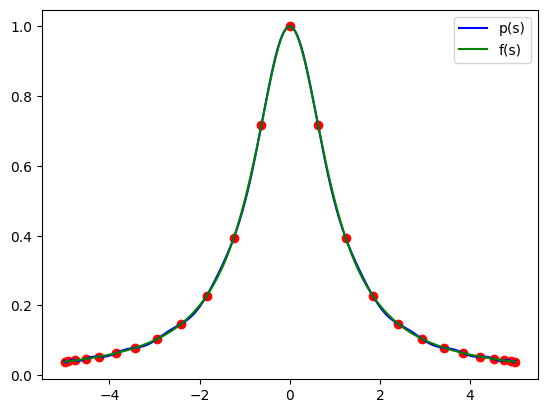

In [ ]:
xx=np.linspace(-5,5,1000)
yy=[poli(s) for s in xx]
fy=[f(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue',label='p(s)')
plt.plot(xx,fy,color='green',label='f(s)')
plt.legend()
plt.show()

**Obs:** A função desse exemplo e os pontos $x_i$ foram escolhidos para tratar do problema chamado de [efeito de Runge](https://pt.wikipedia.org/wiki/Fen%C3%B3meno_de_Runge#:~:text=Em%20matem%C3%A1tica%2C%20em%20particular%20no%20campo%20espec%C3%ADfico%20da,interpola%C3%A7%C3%A3o%20polinomial%20para%20aproximar%20certas%20fun%C3%A7%C3%B5es.%20%5B%201%5D), que deveria ocorrer, caso tomássemos $x_i$ igualmente espaçados. Veja o exemplo a seguir.

#**Exemplo 3:**

Considere $$f(s)=\frac{1}{1+s^2},$$ e encontre o polinômio $p(s)$, que interpole $f(x_i)=y_i$, em que $$x_{i+1}=x_i+h,\qquad h=\frac{b-a}{n},\qquad a=-5,\qquad b=5,$$ para $i=0,\,1,\,\ldots,\,n-1$, com $n=11$.

In [ ]:
n=11
a=-5
b=5

x=np.linspace(a,b,n)

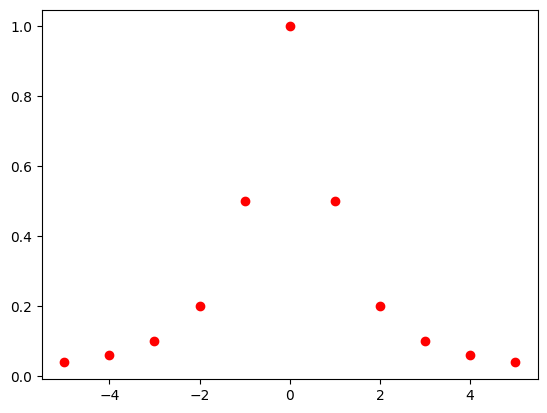

In [ ]:
y=[f(s) for s in x]

n=len(x)

plt.plot(x,y,'o',color="red")
plt.show()

Vamos calcular os termos $f[x_0,x_1,\ldots,x_{j}]$.

In [ ]:
n=len(x)

A = 0*np.empty([n,n])

#-------------- Diferenças divididas
for i in range(0,n):
  A[i][0]=y[i]

for j in range(1,n):
  for i in range(0,n-j):
    A[i][j]=(A[i][j-1]-A[i+1][j-1])/(x[i]-x[i+j])

Definindo os polinômios $N_{j}(s)$ e $p_n(s)$.

In [ ]:
def N(i,s):
  p=1
  for j in range(0,i+1):
    p=p*(s-x[j])
  return p

def poli(s):
  q=A[0][0]
  for i in range(1,n):
    q=q+A[0][i]*N(i-1,s)
  return q

Vejamos se o polinômio é um bom ajuste para os dados:

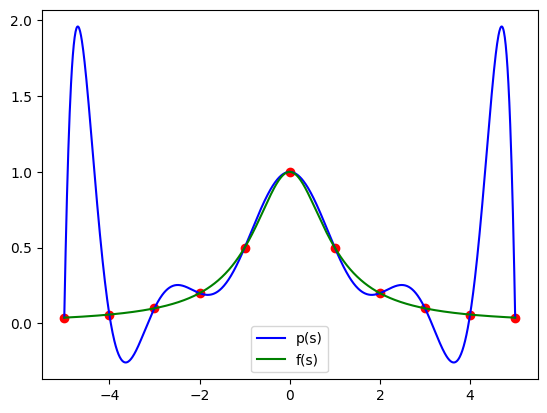

In [ ]:
xx=np.linspace(-5,5,1000)
yy=[poli(s) for s in xx]
fy=[f(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue',label='p(s)')
plt.plot(xx,fy,color='green',label='f(s)')
plt.legend()
plt.show()

#**A forma de Lagrange**

No processo de interpolação polinomial, na [forma de Lagrange](https://pt.wikipedia.org/wiki/Polin%C3%B4mio_de_Lagrange), estamos interessados em encontrar um polinômio $$p_n(s)=L_0(s)y_0+L_1(s)y_1+\cdots L_n(s)y_n$$ para o qual $$p_n(x_i)=y_i,$$ quando $x=(x_0,\,x_1,\,\ldots, x_{n})$ e $y=(y_1,\,y_2,\,\ldots,y_n)$ são vetores reais conhecidos.

Por isso, definimos os polinômios $$N_i(s)=\frac{(s-x_0)(s-x_1)\cdots(s-x_{i-1})(s-x_{i+1})\cdots(s-x_{n})}{(x_i-x_0)(x_i-x_1)\cdots(x_i-x_{i-1})(x_i-x_{i+1})\cdots(x_i-x_{n})}, $$ tais que $$N_i(x_j)=\begin{cases}0,\,\,\text{ se } i\neq j\\1,\,\,\text{ se } i=j\end{cases}.$$

Deixamos para o leitor encontrar $N_i(s)$ para os dados do Exemplo 1.

#**Sobre o erro de aproximação em interpolação polinomial**

Nos exemplos 2 e 3, escolhemos pontos $x_i$ no domínio de uma função conhecida $f(s)$. A partir disso, tomamos $y_i=f(x_i)$.

Nesses casos, o polinômio interpolador $p_n(s)$, na forma de Newton ou de Lagrange, tem a forma $$p_n(s)=\begin{cases} f[x_0]+(s-x_0)f[x_0,x_1]+(s-x_0)(s-x_1)f[x_0,x_1,x_2]+\cdots+(s-x_0)(s-x_1)\cdots(s-x_{n-1})f[x_0,x_1,\ldots,x_n]\\\\\text{ou}\\\\L_0(s)y_0+L_1(s)y_1+\cdots L_n(s)y_n\\\\\text{ou}\\\\\sum_{i=0}^n\alpha_i s^i\end{cases}, $$ para o qual $$p_n(x_i)=y_i=f(x_i),$$ quando $x=(x_0,\,x_1,\,\ldots, x_{n})$ são escolhidos, no domínio de $f(s)$.


Então, podemos definir a função erro $$E(s)=f(s)-p_n(s),$$ e segue que $$E(x_i)=0,\qquad i\in \{0,1,\ldots,n\}.$$


#**Exemplo 4:**

Considere $$f(s)=\frac{1}{1+s^2},$$ e encontre o polinômio $p(s)$, que interpole $f(x_i)=y_i$, em que $$x_{i+1}=x_i+h,\qquad h=\frac{b-a}{n},\qquad a=-5,\qquad b=5,$$ para $i=0,\,1,\,\ldots,\,n-1$, com $n=11$, como no Exemplo 3.

Temos então $E(s)=f(s)-p_{11}(s)$

In [ ]:
def E(s):
  p=f(s)-poli(s)
  return p

Vejamos se o polinômio é um bom ajuste para os dados:

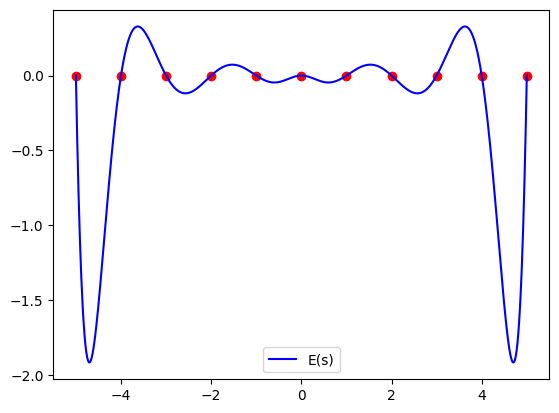

In [ ]:
xx=np.linspace(-5,5,1000)
Ey=[E(s) for s in xx]
ye=[0 for s in x]

plt.plot(x,ye,'o', color='red')
plt.plot(xx,Ey,color='blue',label='E(s)')
plt.legend()
plt.show()

<font color=blue> Supondo que $f(s)$ possua tantas derivadas quanto precisarmos.

Isso quer dizer que a função $E(s)$ possui, pelo menos, $n+1$ pontos de máximo ou de mínimo locais, entre o menor e o maior valor de $x_i$.

O que quer dizer que a função $E'(s)$ possui, pelo menos, $n$ pontos de máximo ou de mínimo locais, entre o menor e o maior valor de $x_i$.

O que quer dizer que a função $E''(s)$ possui, pelo menos, $n-1$ pontos de máximo ou de mínimo locais, entre o menor e o maior valor de $x_i$.

Por fim, quer dizer que a função $E^{(n)}(s)$ (derivada de ordem $n$) possui, pelo menos, $1$ ponto de máximo ou de mínimo local, ou seja, a equação $$E^{(n)}(s)=f^{(n)}(s)-f[x_0,x_1,\ldots,x_n]\times n!=0,$$ possui solução, digamos $s_n$. Segue que $$f[x_0,x_1,\ldots,x_n]=\frac{f^{(n)}(s_n)}{n!},$$ para algum $s_n$, entre o menor e o maior valor de $x_i$.

Então, as [diferenças divididas](https://en.wikipedia.org/wiki/Divided_differences) nos dão aproximações para derivadas de $f(s)$, como $$\begin{cases}f[x_i]&=&y_i=f(x_i)\\\\
f[x_i,x_j]&=&\frac{f[x_i]-f[x_j]}{x_i-x_j}=f'(s_i),\qquad s_i\text{ entre $x_i$ e $x_j$}\\\\
f[x_0,x_1,\ldots,x_j]&=&\frac{f[x_0,x_1,\ldots,x_{j-1}]-f[x_1,x_2,\ldots,x_j]}{x_0-x_j}=\frac{f^{(j)}(s_j)}{j!},\qquad s_j\text{ entre o maior e o menor valor de $x_i$, para $i\in\{0,1,\ldots,j\}$ }\end{cases}$$


Para obtermos uma estimativa do erro $E(x)$, para algum valor de $x$ entre $x_0$ e $x_n$, com $x\neq x_i$, definimos a função $$g(s)=[f(s)-p_n(s)]-[f(x)-p_n(x)]\frac{(s-x_0)(s-x_1)\cdots (s-x_n)}{(x-x_0)(x-x_1)\cdots (x-x_n)}.$$

Segue que $g(s)$ possui pelo menos $n+2$ raízes, a saber $x,\, x_0,\,x_1,\,\ldots,\,x_n$.

Então $g'(s)$ possui pelo menos $n+1$ raízes em $[x_0,x_n]$, $g''(s)$ possui pelo menos $n$ raízes em $[x_0,x_n]$,..., e que $g^{(n+1)}(s)$ possui pelo menos uma raiz $\alpha\in [x_0,x_n]$.

Logo, $$0=g^{(n+1)}(\alpha)=f^{(n+1)}(\alpha)-[f(x)-p_n(x)]\frac{(n+1)!}{(x-x_0)(x-x_1)\cdots (x-x_n)}.$$ Isso demonstra o resultado que segue.

**Teorema:**
	Dados $n$ valores distintos para $x$ no intervalo $[b,c]$ e $n$ valores para $y$.
  
  Se $y=f(x)$, $p_n(s)$ for o polinômio interpolador nesses pontos e $f(s)$ possuir derivadas até a ordem $n+1$ em $[b,c]$, então $$f(s)-p_n(s)=\frac{(x-x_0)(x-x_1)\cdots (x-x_n)}{(n+1)!}f^{(n+1)}(\alpha_s),$$ para algum $\alpha_s\in [b,c]$.
  
  Em particular,
	$$|E(x)|\leq \max_{s\in [b,c]} | f^{(n+1)}(s)|\frac{|(x-x_0)(x-x_1)\cdots (x-x_n)|}{(n+1)!}.$$




#**Exemplo 5:**

Considere $$f(s)=\cos(s),$$ e encontre o polinômio $p(s)$, que interpole $f(x_i)=y_i$, em que $$x_{i+1}=x_i+h,\qquad h=\frac{b-a}{n},\qquad a=-5,\qquad b=5,$$ para $i=0,\,1,\,\ldots,\,n-1$, com $n=25$.

In [34]:
n=25
a=-5
b=5

x=np.linspace(a,b,n)

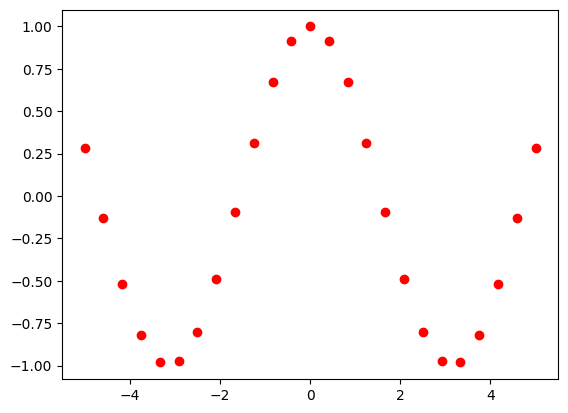

In [35]:
def f(s):
  return np.cos(s)

y=[f(s) for s in x]

n=len(x)

plt.plot(x,y,'o',color="red")
plt.show()

Vamos calcular os termos $f[x_0,x_1,\ldots,x_{j}]$.

In [36]:
n=len(x)

A = 0*np.empty([n,n])

#-------------- Diferenças divididas
for i in range(0,n):
  A[i][0]=y[i]

for j in range(1,n):
  for i in range(0,n-j):
    A[i][j]=(A[i][j-1]-A[i+1][j-1])/(x[i]-x[i+j])

Definindo os polinômios $N_{j}(s)$ e $p_n(s)$.

In [37]:
def N(i,s):
  p=1
  for j in range(0,i+1):
    p=p*(s-x[j])
  return p

def poli(s):
  q=A[0][0]
  for i in range(1,n):
    q=q+A[0][i]*N(i-1,s)
  return q

Vejamos se o polinômio é um bom ajuste para os dados:

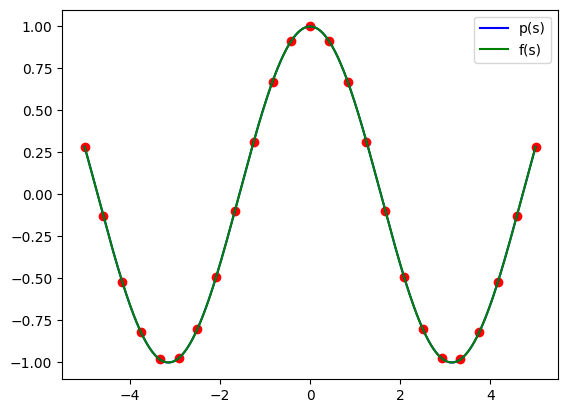

In [38]:
xx=np.linspace(-5,5,1000)
yy=[poli(s) for s in xx]
fy=[f(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue',label='p(s)')
plt.plot(xx,fy,color='green',label='f(s)')
plt.legend()
plt.show()

Temos então $E(s)=f(s)-p_{11}(s)$ é tal que
Em particular,
	$$|E(x)|\leq \frac{(x-x_0)(x-x_1)\cdots (x-x_n)}{(n+1)!},$$ porque $|f^{(n)}(s)|\leq 1$.

In [39]:
def E(s):
  p=f(s)-poli(s)
  return p

Vejamos se o polinômio é um bom ajuste para os dados:

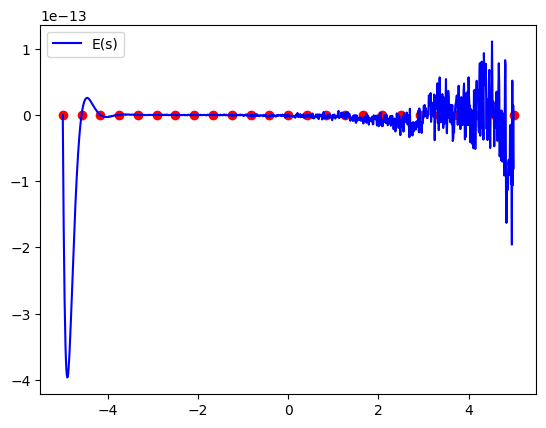

In [40]:
xx=np.linspace(-5,5,1000)
Ey=[E(s) for s in xx]
ye=[0 for s in x]

plt.plot(x,ye,'o', color='red')
plt.plot(xx,Ey,color='blue',label='E(s)')
plt.legend()
plt.show()